![Portada de Netflix](https://upload.wikimedia.org/wikipedia/commons/6/69/Netflix_logo.svg)

# An√°lisis del Cat√°logo de Netflix

## 1. Presentaci√≥n del Problema de Negocio

Netflix necesita comprender el crecimiento de su cat√°logo, la predominancia de t√≠tulos de Estados Unidos y la frecuencia del g√©nero 'Drama'.

El objetivo es identificar patrones que permitan mejorar la estrategia de contenido y diversificaci√≥n global.

In [143]:
# Librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [144]:
import pandas as pd

# Especificar la ruta completa con el nombre del archivo
ruta = r"C:\Users\javie\OneDrive\Escritorio\eda_ml\src\data\netflix_titles.csv"  
df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataframe
print(df.head())



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [145]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [146]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [147]:
print(df.shape)


(8807, 12)


In [148]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


## 2. Planteamiento del Problema T√©cnico

Utilizaremos EDA para identificar tendencias de crecimiento y distribuci√≥n geogr√°fica.

Aplicaremos modelos de clasificaci√≥n binaria (Random Forest) para validar las hip√≥tesis planteadas.

## 3. Descripci√≥n del Dataset y EDA


In [149]:
# Informaci√≥n general del dataset
print("Informaci√≥n del dataset:")
print(df.info())




Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [150]:
# Comprobaci√≥n de valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [151]:
# Limpieza de datos: Imputaci√≥n de valores faltantes
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1448409047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1448409047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [152]:
# Eliminar filas con date_added nulo (son pocas)
df.dropna(subset=['date_added'], inplace=True)

# Confirmar que ya no hay valores nulos
print("Valores nulos despu√©s de la limpieza:\n")
print(df.isnull().sum())

Valores nulos despu√©s de la limpieza:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# An√°lisis de la Hip√≥tesis 1: Crecimiento del Cat√°logo de Netflix

### An√°lisis Univariante

In [153]:
# Estad√≠sticos de Centralidad y Dispersi√≥n
print("\nEstad√≠sticos descriptivos del a√±o de lanzamiento:")
print(df['release_year'].describe())


Estad√≠sticos descriptivos del a√±o de lanzamiento:
count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


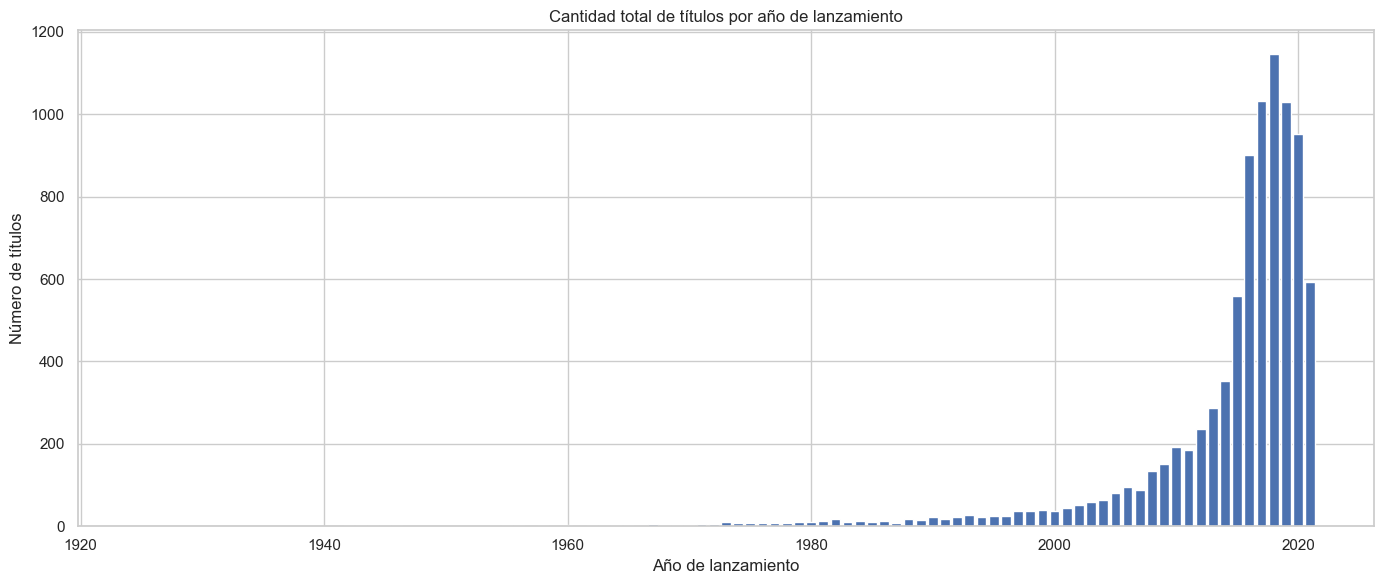

In [154]:
# Asegurarte de que release_year es num√©rico
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Contar cu√°ntos t√≠tulos hay por a√±o
titles_per_year = df['release_year'].value_counts().sort_index()

# Gr√°fico
plt.figure(figsize=(14,6))
plt.bar(titles_per_year.index, titles_per_year.values)
plt.title('Cantidad total de t√≠tulos por a√±o de lanzamiento')
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('N√∫mero de t√≠tulos')
plt.grid(True)
plt.tight_layout()
plt.show()

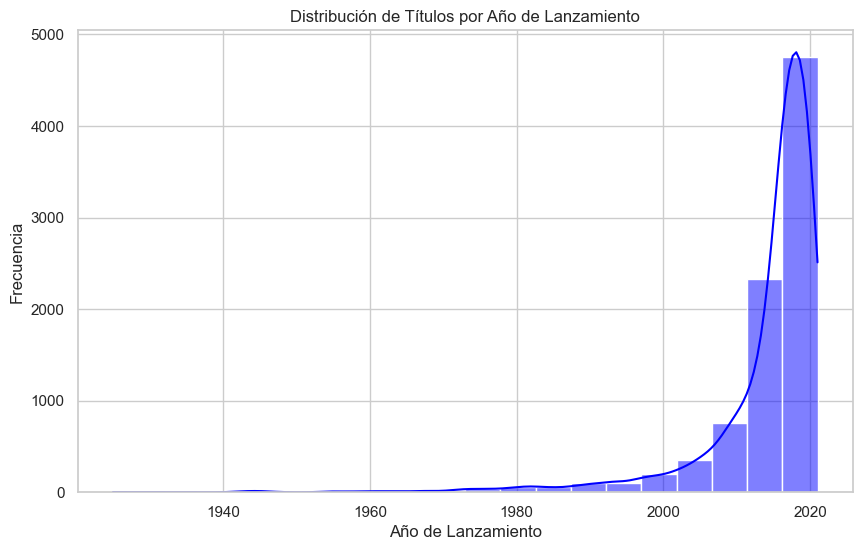

In [155]:
# Visualizaci√≥n: Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=20, kde=True, color='blue')
plt.title("Distribuci√≥n de T√≠tulos por A√±o de Lanzamiento")
plt.xlabel("A√±o de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

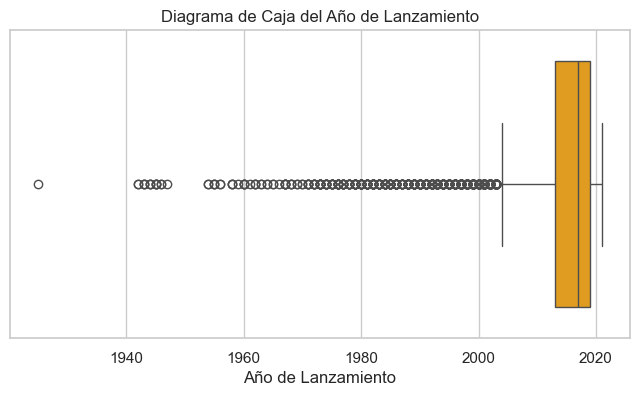

In [156]:
# Visualizaci√≥n: Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['release_year'], color='orange')
plt.title("Diagrama de Caja del A√±o de Lanzamiento")
plt.xlabel("A√±o de Lanzamiento")
plt.show()

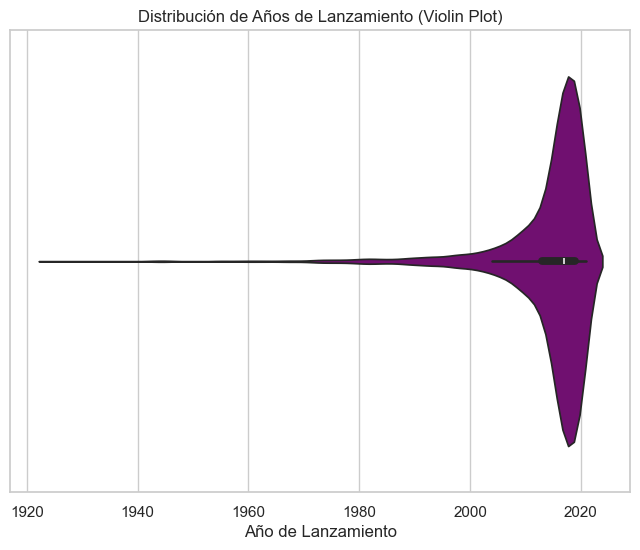

In [157]:
# Visualizaci√≥n: Violin Plot
plt.figure(figsize=(8,6))
sns.violinplot(x=df['release_year'], color='purple')
plt.title("Distribuci√≥n de A√±os de Lanzamiento (Violin Plot)")
plt.xlabel("A√±o de Lanzamiento")
plt.show()

### An√°lisis Bivariante

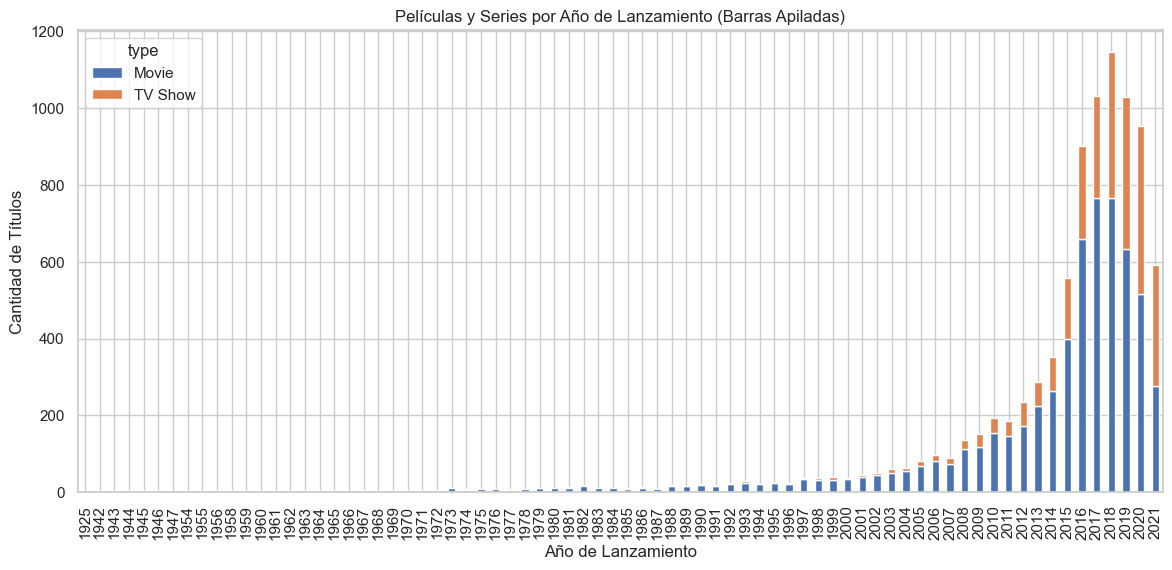

In [158]:

# Agrupar t√≠tulos por a√±o y tipo
df_type_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Gr√°fico de Barras Apiladas
df_type_year.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Pel√≠culas y Series por A√±o de Lanzamiento (Barras Apiladas)")
plt.xlabel("A√±o de Lanzamiento")
plt.ylabel("Cantidad de T√≠tulos")
plt.show()

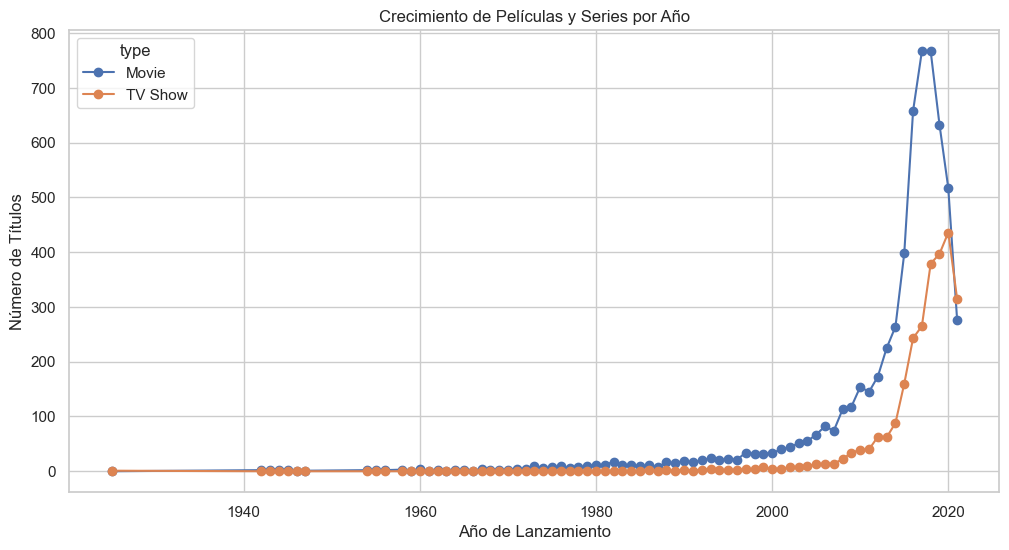

In [159]:
# Gr√°fico Comparativo: Pel√≠culas vs Series por A√±o
df_type_year.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Crecimiento de Pel√≠culas y Series por A√±o")
plt.xlabel("A√±o de Lanzamiento")
plt.ylabel("N√∫mero de T√≠tulos")
plt.grid(True)
plt.show()


### An√°lisis Multivariante

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\2952263477.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


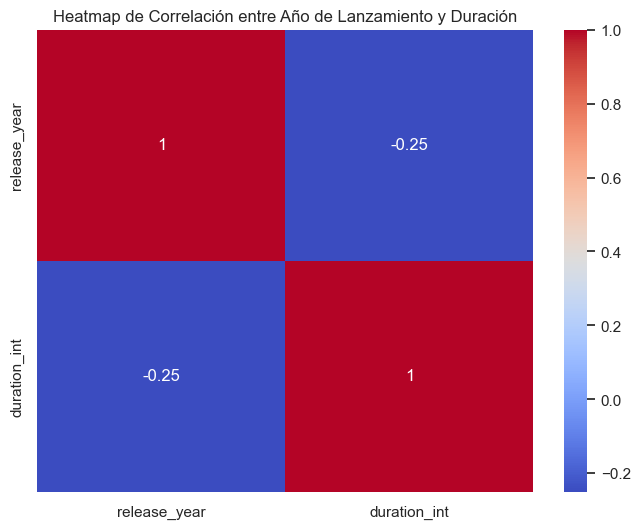

In [160]:
# Heatmap de Correlaci√≥n
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlaci√≥n entre A√±o de Lanzamiento y Duraci√≥n")
plt.show()

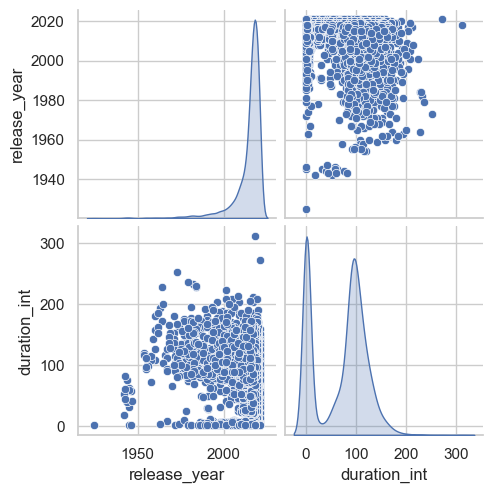

In [161]:
# Pairplot para observar relaciones cruzadas
sns.pairplot(df[['release_year', 'duration_int']], diag_kind='kde')
plt.show()


## Conclusi√≥n

 Los resultados confirman que el cat√°logo de Netflix ha crecido significativamente en los √∫ltimos a√±os, especialmente entre 2012 y 2018.

 Aunque se observa una leve disminuci√≥n despu√©s de 2019, el volumen total de t√≠tulos sigue siendo considerablemente alto.
 
 Adem√°s, las pel√≠culas predominan frente a las series, aunque ambas han mostrado un crecimiento progresivo.


## Machine Learning

## Hip√≥tesis 1: ‚ÄúNetflix ha aumentado significativamente la cantidad de contenido en los √∫ltimos a√±os‚Äù

Objetivo del modelo: Predecir si un t√≠tulo es reciente (a√±o de lanzamiento > 2016) bas√°ndose en:

tipo de contenido (pel√≠cula o serie)

pa√≠s principal

duraci√≥n

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\3977042105.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       810
           1       0.64      0.65      0.65       950

    accuracy                           0.62      1760
   macro avg       0.61      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760


Matriz de Confusi√≥n:
[[467 343]
 [331 619]]


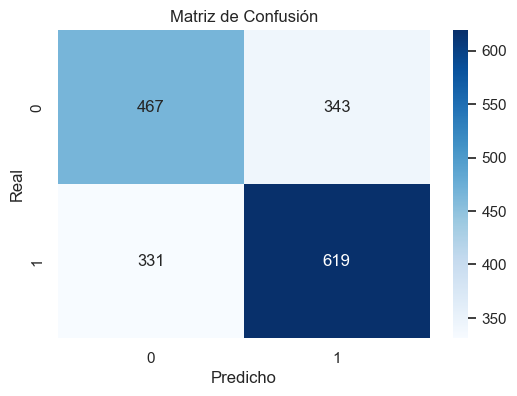

In [162]:
# Preparaci√≥n de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Selecci√≥n de caracter√≠sticas (tipo de contenido, pa√≠s principal, duraci√≥n)
X = pd.get_dummies(df[['type', 'country', 'duration_int']], drop_first=True)
y = (df['release_year'] > 2016).astype(int)

# Divisi√≥n del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creaci√≥n y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Matriz de Confusi√≥n
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

# Visualizaci√≥n de la Matriz de Confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()



Importancia de las Caracter√≠sticas:
                                                    Importancia
duration_int                                           0.507818
type_TV Show                                           0.035755
country_Unknown                                        0.028501
country_Taiwan                                         0.013555
country_India                                          0.011436
...                                                         ...
country_Germany, United States, Sweden                 0.000000
country_Germany, United States, United Kingdom,...     0.000000
country_Switzerland, Vatican City, Italy, Germa...     0.000000
country_United States, Brazil, Japan, Spain, India     0.000000
country_Pakistan, United Arab Emirates                 0.000000

[750 rows x 1 columns]


C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1606213277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importancia'], y=feature_importances.index, palette='viridis')


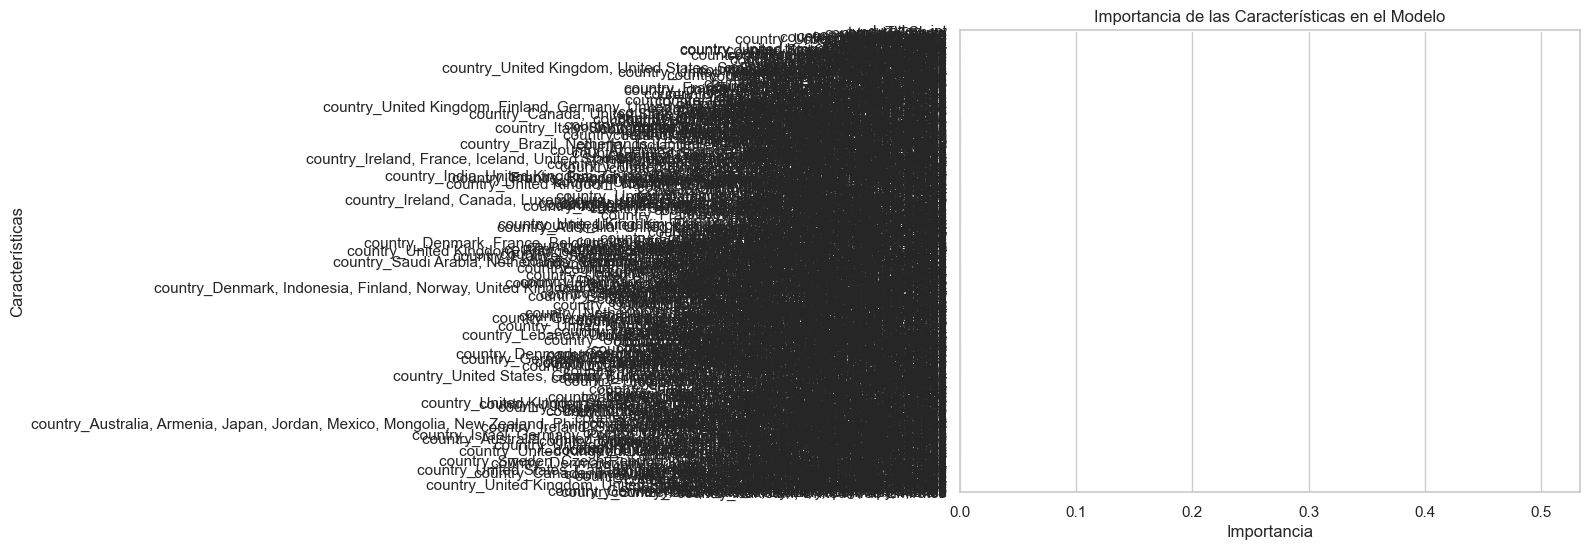

In [163]:
# Importancia de las caracter√≠sticas
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)

print("\nImportancia de las Caracter√≠sticas:")
print(feature_importances)

# Visualizaci√≥n de la importancia de las caracter√≠sticas
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Importancia'], y=feature_importances.index, palette='viridis')
plt.title("Importancia de las Caracter√≠sticas en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.show()


# Hip√≥tesis 2: La mayor√≠a del contenido en Netflix proviene de Estados Unidos

### An√°lisis Univariante

In [164]:
# An√°lisis Univariante
print("\nEstad√≠sticos descriptivos del pa√≠s principal:")
print(df['country'].describe())
print("\nFrecuencia de pa√≠ses:")
print(df['country'].value_counts())


Estad√≠sticos descriptivos del pa√≠s principal:
count              8797
unique              749
top       United States
freq               2812
Name: country, dtype: object

Frecuencia de pa√≠ses:
country
United States                             2812
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1116078428.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_top_countries, x='country', kde=True, palette='viridis')


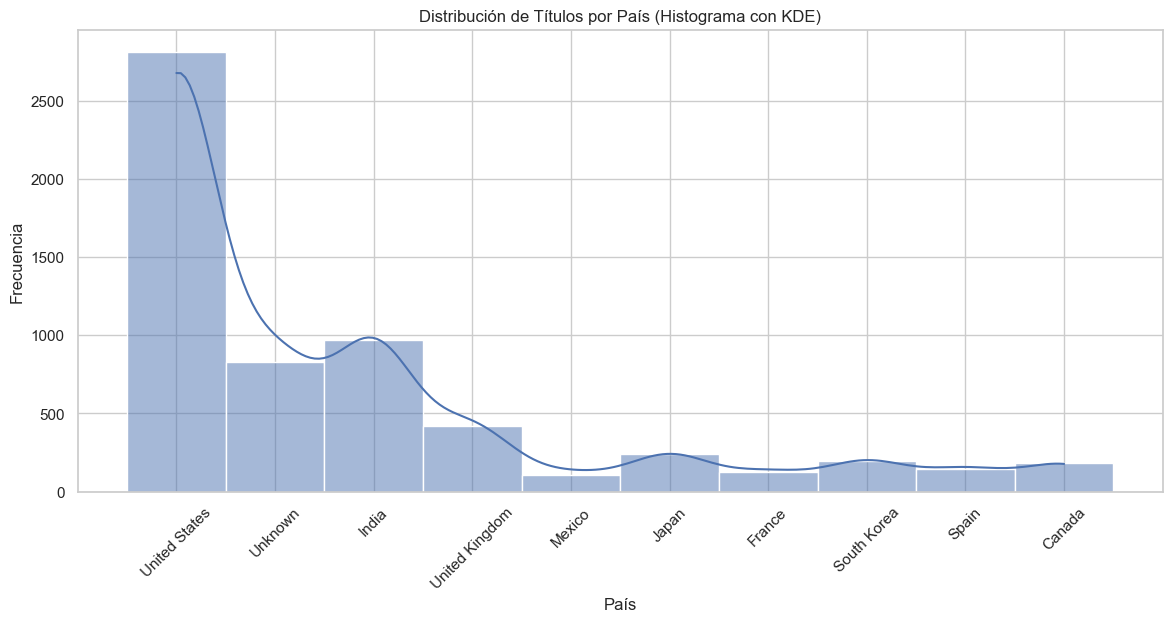

C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1116078428.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='country', y='release_year', palette='viridis')


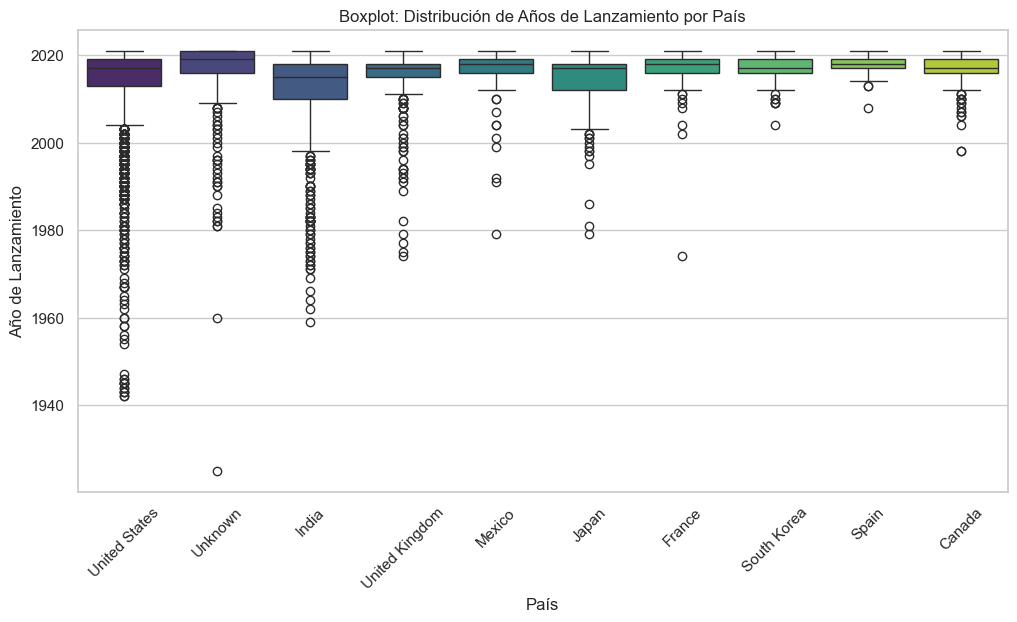

C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1116078428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_countries, x='country', y='release_year', palette='viridis')


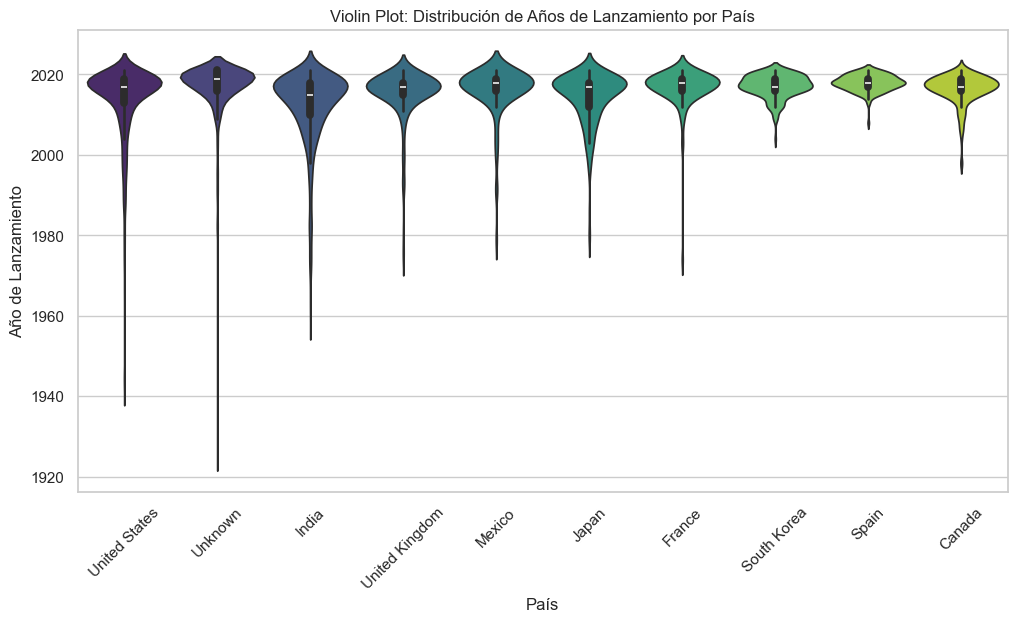

In [165]:
# Agrupar y contar t√≠tulos por pa√≠s
country_counts = df['country'].value_counts()

# Filtrar los 10 pa√≠ses m√°s representativos para gr√°ficos
top_countries = country_counts.head(10)

# Crear el DataFrame solo con los 10 pa√≠ses m√°s frecuentes
df_top_countries = df[df['country'].isin(top_countries.index)]

# Visualizaci√≥n: Histograma con KDE
plt.figure(figsize=(14, 6))
sns.histplot(data=df_top_countries, x='country', kde=True, palette='viridis')
plt.title("Distribuci√≥n de T√≠tulos por Pa√≠s (Histograma con KDE)")
plt.xlabel("Pa√≠s")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Visualizaci√≥n: Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='country', y='release_year', palette='viridis')
plt.title("Boxplot: Distribuci√≥n de A√±os de Lanzamiento por Pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("A√±o de Lanzamiento")
plt.xticks(rotation=45)
plt.show()

# Visualizaci√≥n: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_countries, x='country', y='release_year', palette='viridis')
plt.title("Violin Plot: Distribuci√≥n de A√±os de Lanzamiento por Pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("A√±o de Lanzamiento")
plt.xticks(rotation=45)
plt.show()


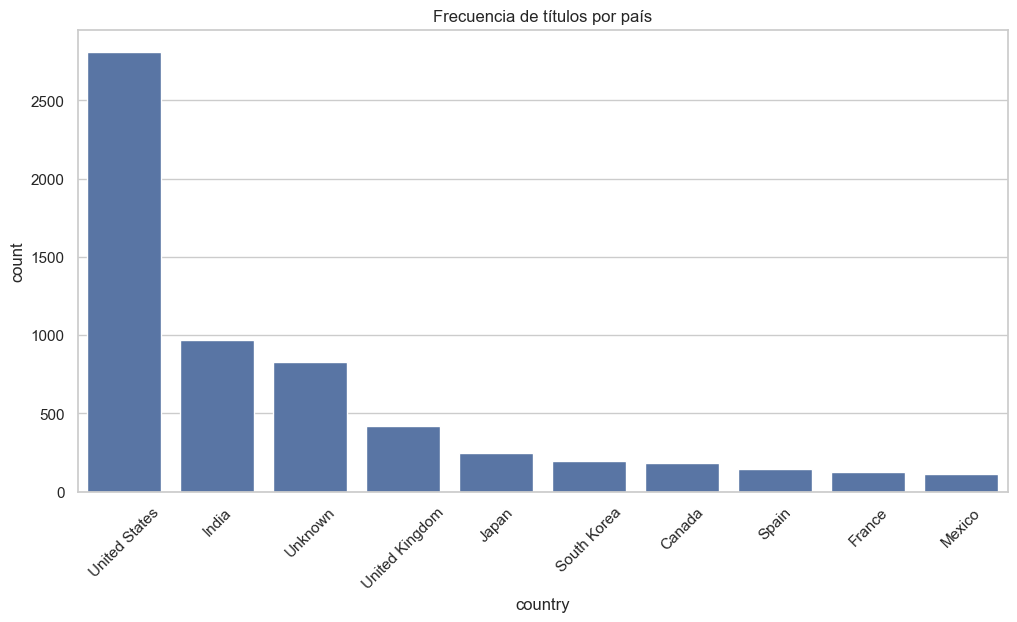

In [166]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
plt.title('Frecuencia de t√≠tulos por pa√≠s')
plt.xticks(rotation=45)
plt.show()


### An√°lisis Bivariante

In [167]:
# An√°lisis Bivariante: Relaci√≥n entre pa√≠s y tipo de contenido
country_type = df.groupby(['country', 'type']).size().unstack()
print("\nConteo de t√≠tulos por pa√≠s y tipo:")
print(country_type.head(10))


Conteo de t√≠tulos por pa√≠s y tipo:
type                                                Movie  TV Show
country                                                           
, France, Algeria                                     1.0      NaN
, South Korea                                         NaN      1.0
Argentina                                            38.0     18.0
Argentina, Brazil, France, Poland, Germany, Den...    1.0      NaN
Argentina, Chile                                      2.0      NaN
Argentina, Chile, Peru                                1.0      NaN
Argentina, France                                     1.0      NaN
Argentina, France, United States, Germany, Qatar      1.0      NaN
Argentina, Italy                                      1.0      NaN
Argentina, Spain                                      7.0      1.0


<Figure size 1200x600 with 0 Axes>

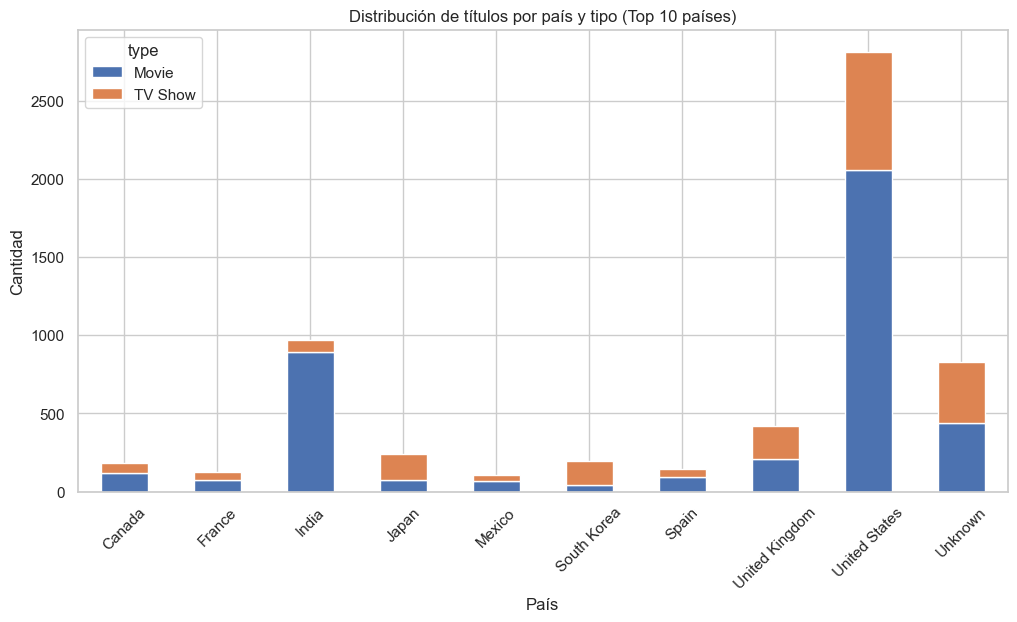

In [168]:
# Seleccionar los 10 pa√≠ses con m√°s t√≠tulos
top_countries = df['country'].value_counts().index[:10]

# Filtrar el dataframe para los 10 pa√≠ses principales
df_top_countries = df[df['country'].isin(top_countries)]

# Agrupar por pa√≠s y tipo (Movie/TV Show)
country_type = df_top_countries.groupby(['country', 'type']).size().unstack()

# Gr√°fico de barras apiladas
plt.figure(figsize=(12, 6))
country_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuci√≥n de t√≠tulos por pa√≠s y tipo (Top 10 pa√≠ses)')
plt.xlabel('Pa√≠s')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


### An√°lisis Multivariante

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\796826554.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


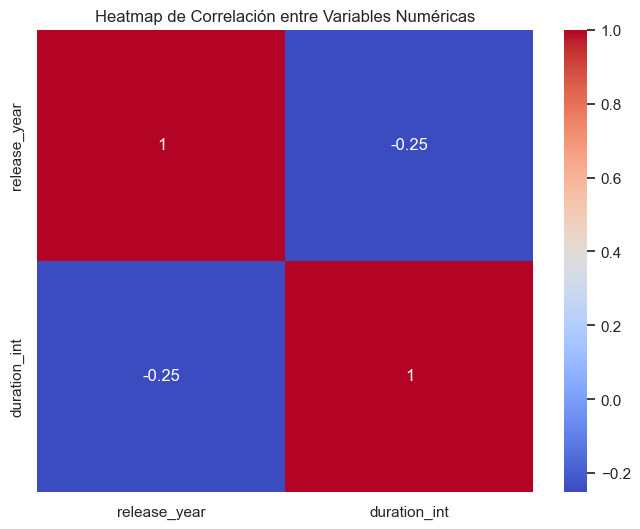

In [169]:
# An√°lisis Multivariante: Heatmap de correlaci√≥n entre variables num√©ricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlaci√≥n entre Variables Num√©ricas')
plt.show()




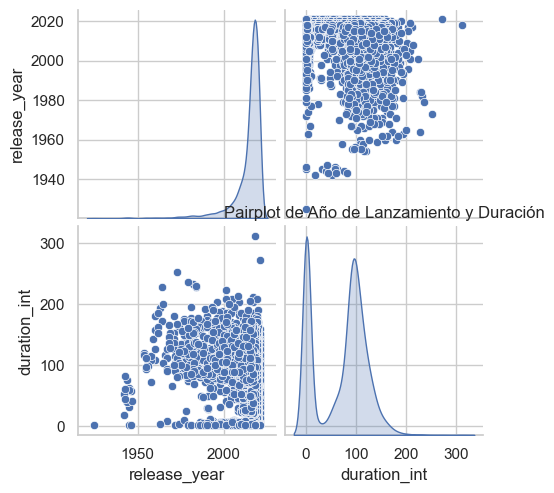

In [170]:
# An√°lisis Multivariante: Pairplot para observar relaciones cruzadas
sns.pairplot(df[['release_year', 'duration_int']], diag_kind='kde')
plt.title("Pairplot de A√±o de Lanzamiento y Duraci√≥n")
plt.show()


#### Conclusi√≥n

El an√°lisis confirma que la mayor√≠a del contenido en Netflix proviene de Estados Unidos, especialmente en formato de pel√≠culas.

Otros pa√≠ses como India y Reino Unido tambi√©n tienen una representaci√≥n significativa, aunque mucho menor.

## Machine Learning

## Hip√≥tesis 2: ‚ÄúLa mayor√≠a del contenido en Netflix proviene de Estados Unidos‚Äù

Objetivo del modelo: Predecir si un t√≠tulo proviene de Estados Unidos (üá∫üá∏) en funci√≥n de:

type (Movie o TV Show)

release_year

duration_int

Tarea: Clasificaci√≥n binaria ‚Üí EE.UU. (1) vs. Otro pa√≠s (0)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\224125269.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1185
           1       0.49      0.32      0.39       575

    accuracy                           0.67      1760
   macro avg       0.60      0.58      0.58      1760
weighted avg       0.64      0.67      0.65      1760


Matriz de Confusi√≥n:
[[992 193]
 [390 185]]


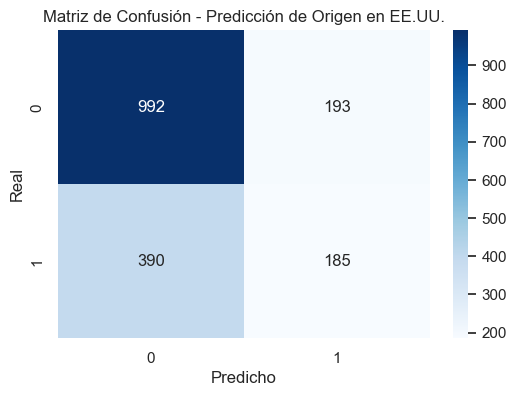


Importancia de las Caracter√≠sticas:
              Importancia
duration_int     0.667855
release_year     0.317874
type_TV Show     0.014271


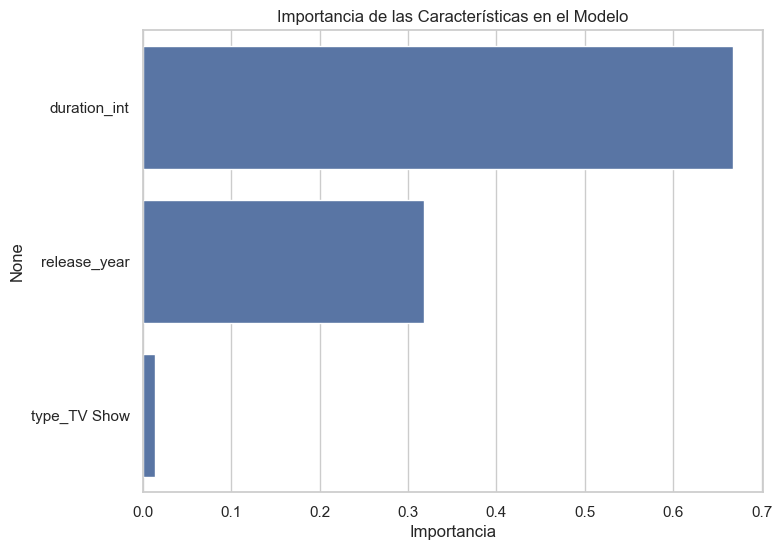

In [171]:
# Importaci√≥n de librer√≠as necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Preparaci√≥n de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Crear la variable objetivo: Si el pa√≠s es "United States" -> 1, de lo contrario -> 0
df['is_usa'] = np.where(df['country'] == 'United States', 1, 0)

# Selecci√≥n de caracter√≠sticas (tipo de contenido, a√±o de lanzamiento, duraci√≥n)
X = pd.get_dummies(df[['type', 'release_year', 'duration_int']], drop_first=True)
y = df['is_usa']

# Divisi√≥n del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creaci√≥n y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Matriz de Confusi√≥n
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

# Visualizaci√≥n de la Matriz de Confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusi√≥n - Predicci√≥n de Origen en EE.UU.")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Importancia de caracter√≠sticas
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)
print("\nImportancia de las Caracter√≠sticas:")
print(feature_importances)

# Visualizaci√≥n de la importancia de las caracter√≠sticas
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Importancia'], y=feature_importances.index)
plt.title("Importancia de las Caracter√≠sticas en el Modelo")
plt.show()


# Hip√≥tesis 3: El g√©nero "Drama" es el m√°s com√∫n en Netflix

### An√°lisis Univariante

In [172]:
# Estad√≠sticos descriptivos del g√©nero
print("\nEstad√≠sticos descriptivos del g√©nero:")
print(df['listed_in'].describe())



Estad√≠sticos descriptivos del g√©nero:
count                             8797
unique                             513
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object


In [173]:
# Conteo de g√©neros m√°s comunes
genre_counts = df['listed_in'].value_counts().head(10)
print("\nG√©neros m√°s comunes:")
print(genre_counts)


G√©neros m√°s comunes:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_24296\2180135870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


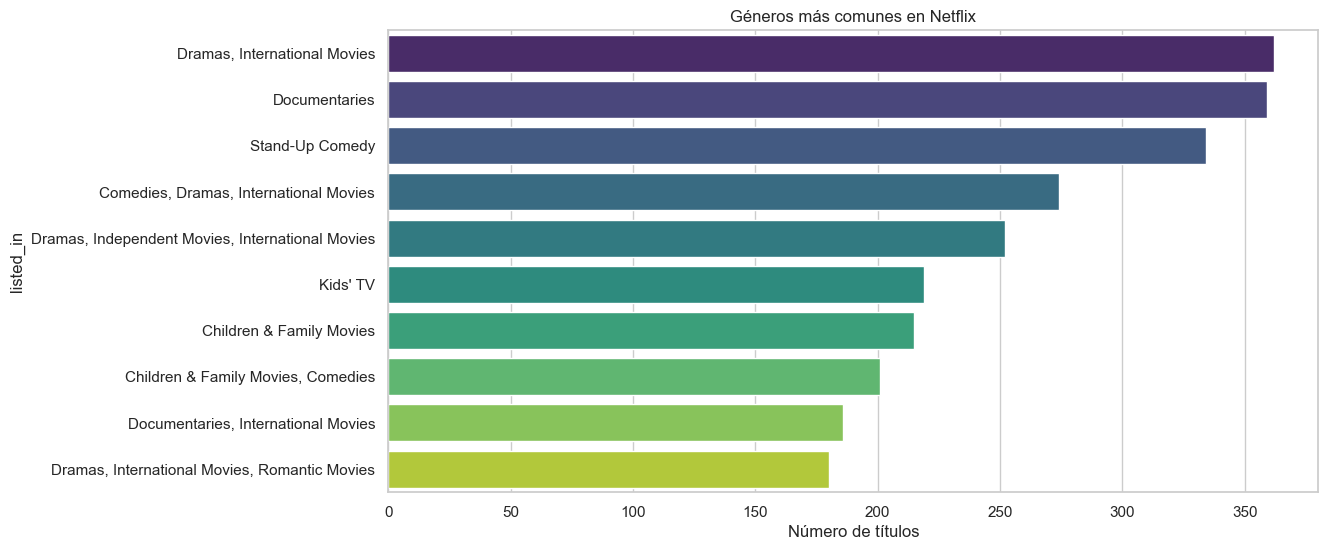

In [174]:
# Visualizaci√≥n Univariante: Gr√°fico de barras de los g√©neros m√°s comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('G√©neros m√°s comunes en Netflix')
plt.xlabel('N√∫mero de t√≠tulos')
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_24296\59451501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')


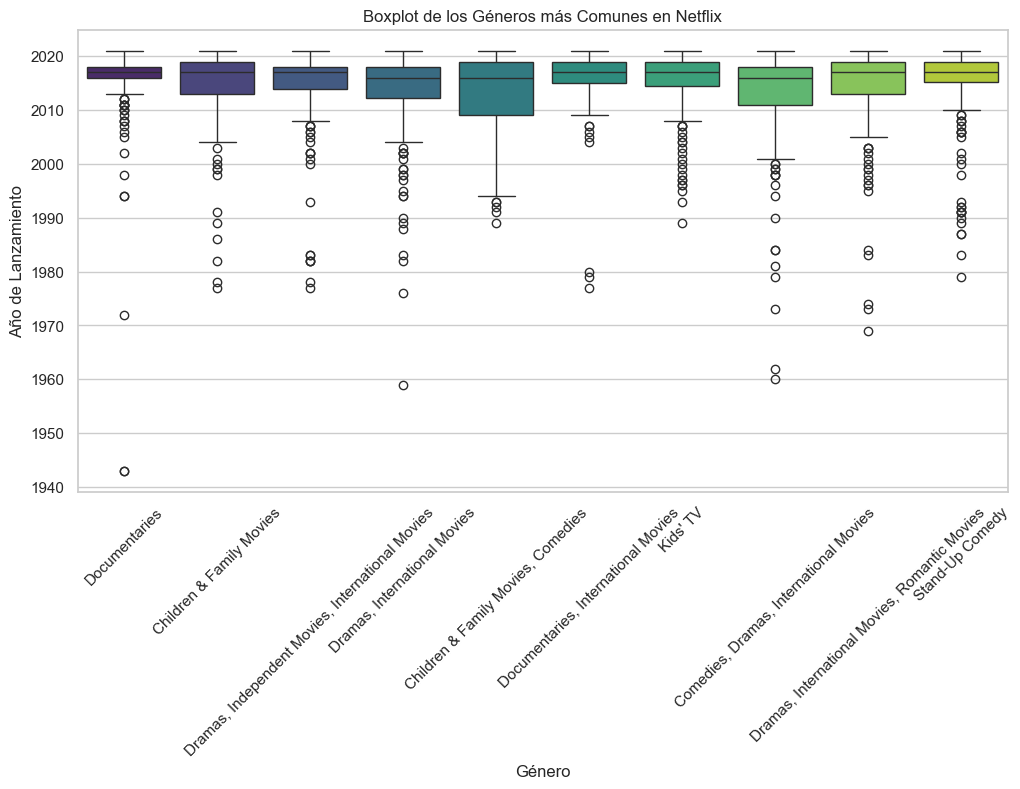

In [175]:
# Crear una lista con los 10 g√©neros m√°s comunes
top_genres = genre_counts.index

# Filtrar el DataFrame para que contenga solo los g√©neros m√°s comunes
df_top_genres = df[df['listed_in'].isin(top_genres)]

# Visualizaci√≥n Univariante: Boxplot de los g√©neros m√°s comunes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')
plt.title('Boxplot de los G√©neros m√°s Comunes en Netflix')
plt.xlabel('G√©nero')
plt.ylabel('A√±o de Lanzamiento')
plt.xticks(rotation=45)
plt.show()




C:\Users\javie\AppData\Local\Temp\ipykernel_24296\2566975947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')


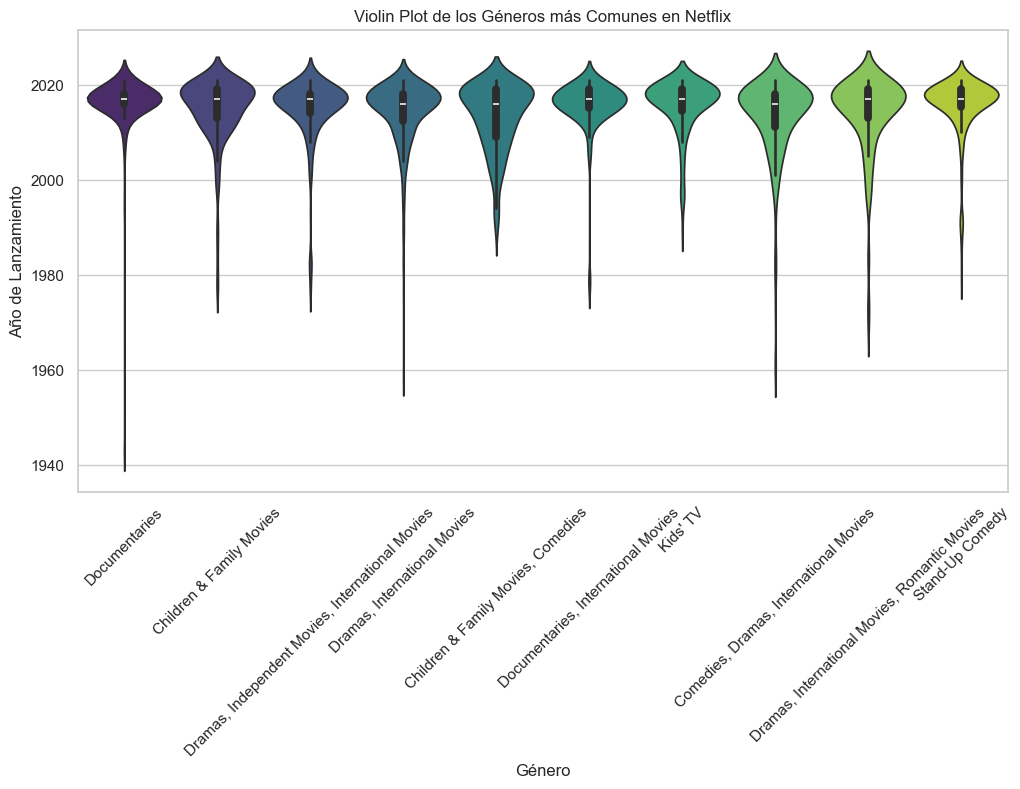

In [176]:
# Visualizaci√≥n Univariante: Violin Plot de los g√©neros m√°s comunes
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')
plt.title('Violin Plot de los G√©neros m√°s Comunes en Netflix')
plt.xlabel('G√©nero')
plt.ylabel('A√±o de Lanzamiento')
plt.xticks(rotation=45)
plt.show()


### An√°lisis Bivariante

In [177]:
# Comparar el g√©nero "Drama" en pel√≠culas y series
drama_movies = df[df['listed_in'].str.contains('Dramas') & (df['type'] == 'Movie')].shape[0]
drama_tvshows = df[df['listed_in'].str.contains('TV Dramas') & (df['type'] == 'TV Show')].shape[0]

C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1239951943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')


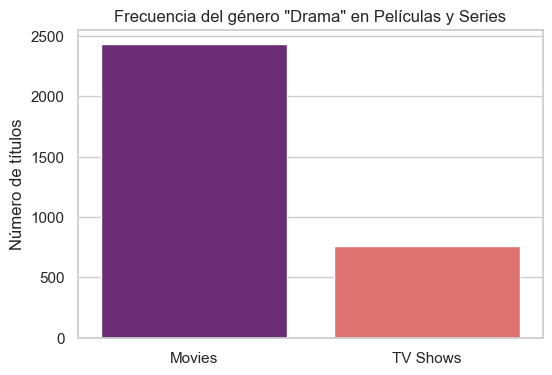

In [178]:
# Gr√°fico de barras para comparar
plt.figure(figsize=(6, 4))
sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')
plt.title('Frecuencia del g√©nero "Drama" en Pel√≠culas y Series')
plt.ylabel('N√∫mero de t√≠tulos')
plt.show()

### An√°lisis Multivariante

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1055755439.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


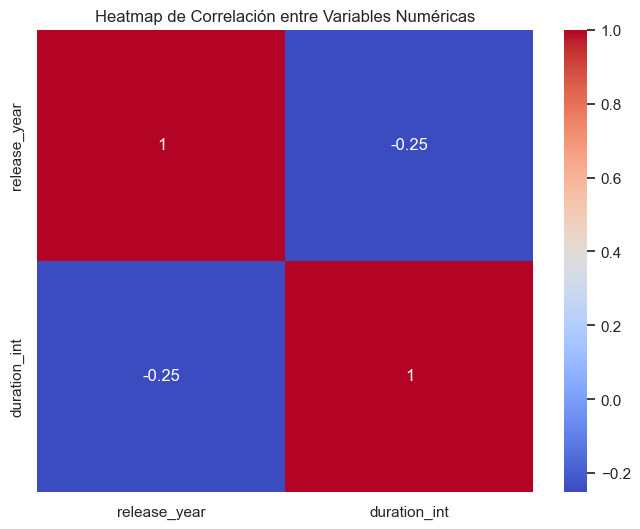

In [179]:
# Heatmap de correlaci√≥n entre variables num√©ricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlaci√≥n entre Variables Num√©ricas')
plt.show()



### Conclusi√≥n

El an√°lisis confirma que el g√©nero "Drama" es predominante en el cat√°logo de Netflix, especialmente en formato de pel√≠culas. Esto respalda la hip√≥tesis planteada.

## Hip√≥tesis 3 ‚Äì Machine Learning
‚ÄúEl g√©nero 'Drama' es el m√°s com√∫n en Netflix‚Äù

Objetivo del modelo:

Predecir si un t√≠tulo pertenece al g√©nero "Dramas" utilizando un modelo de clasificaci√≥n basado en sus caracter√≠sticas:

type (Movie o TV Show)

main_country (Pa√≠s principal de origen)

release_year (A√±o de lanzamiento)

duration_int (Duraci√≥n en minutos o temporadas)

Tarea:

Clasificaci√≥n binaria:

1: T√≠tulo que pertenece al g√©nero "Dramas" o "TV Dramas"

0: T√≠tulo que no pertenece al g√©nero Drama

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_24296\1168119056.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1113
           1       0.58      0.51      0.54       647

    accuracy                           0.69      1760
   macro avg       0.66      0.65      0.65      1760
weighted avg       0.68      0.69      0.68      1760


Matriz de Confusi√≥n:
[[880 233]
 [319 328]]


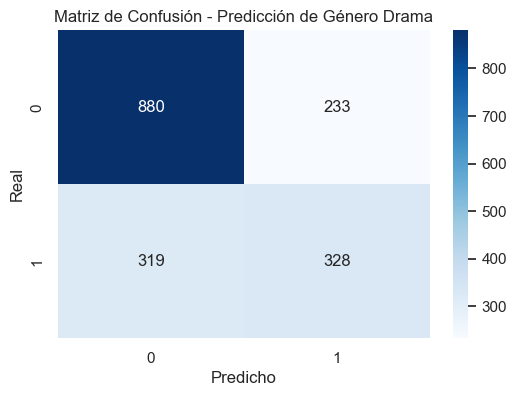

In [180]:
# Importaci√≥n de librer√≠as necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Preparaci√≥n de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Crear la variable objetivo: 1 si el g√©nero contiene "Dramas" o "TV Dramas", 0 de lo contrario
df['is_drama'] = df['listed_in'].apply(lambda x: 1 if 'Dramas' in x or 'TV Dramas' in x else 0)

# Selecci√≥n de caracter√≠sticas (type, country, release_year, duration_int)
X = pd.get_dummies(df[['type', 'country', 'release_year', 'duration_int']], drop_first=True)
y = df['is_drama']

# Divisi√≥n del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creaci√≥n y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificaci√≥n
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Matriz de Confusi√≥n
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

# Visualizaci√≥n de la Matriz de Confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusi√≥n - Predicci√≥n de G√©nero Drama")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()




C:\Users\javie\AppData\Local\Temp\ipykernel_24296\3646680852.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')


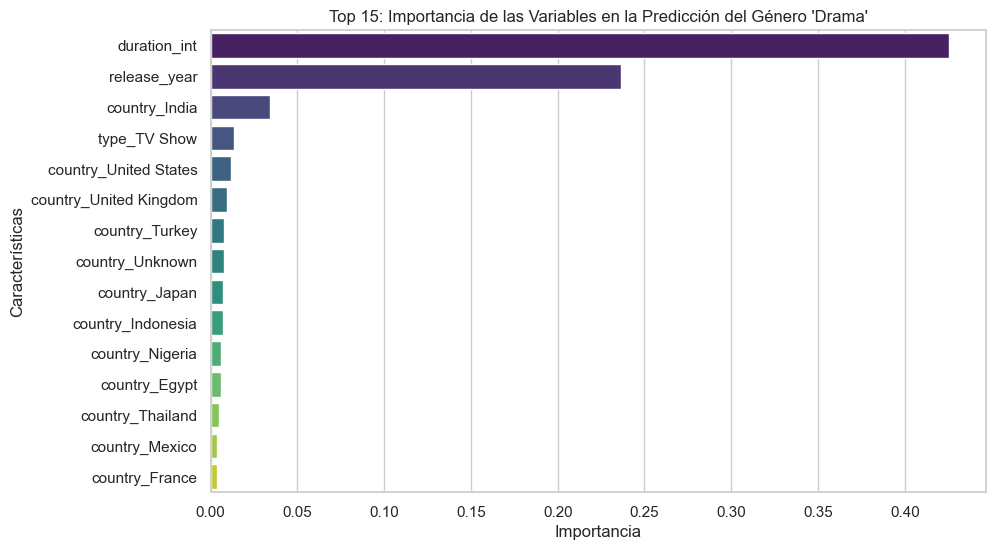

In [181]:
# Ordenar las caracter√≠sticas por importancia
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)

# Seleccionar las 15 caracter√≠sticas m√°s importantes
top_features = feature_importances.head(15)

# Gr√°fico de la importancia de caracter√≠sticas (mejorado)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')
plt.title("Top 15: Importancia de las Variables en la Predicci√≥n del G√©nero 'Drama'")
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.show()
